<a href="https://colab.research.google.com/github/ajaythakur3369/CodSoft-Internship/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Credit Card Fraud Detection**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CodSoft**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodSoft-Internship)**

# **Problem Statement -**

* Build a machine learning model to identify fraudulent credit card transactions.

* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.

* Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.

* Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.


# **Let's Begin !**

### **Import Libraries**

**We first import all essential Python packages used for credit card fraud detection. These include Pandas and NumPy for data handling, Matplotlib for data visualization, SciPy's stats module for statistical functions, Seaborn for enhanced visualization, and scikit-learn modules for model building and evaluation.**

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report

rcParams['figure.figsize'] = 14, 8

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)

import warnings
warnings.filterwarnings('ignore')

### **Import the dataset**

**The dataset we are going to use is from a CSV file named "creditcard.csv". The dataset contains transaction data, including features such as transaction amount, time, and other attributes, which can be used for credit card fraud detection.**

In [ ]:
# Access the Drive from Colab to access the required file
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodSoft/File_Name/Credit_card_dataset.csv")

### **Exploring Data**

**The initial data exploration is used to take a look at the dataset for better understanding.**

In [ ]:
# Display the first five rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Shape of the data
df.shape

(284807, 31)

In [ ]:
# Displays information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Used to display any missing values in the DataFrame
df.isnull().values.any()

False

In [ ]:
# Describing the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


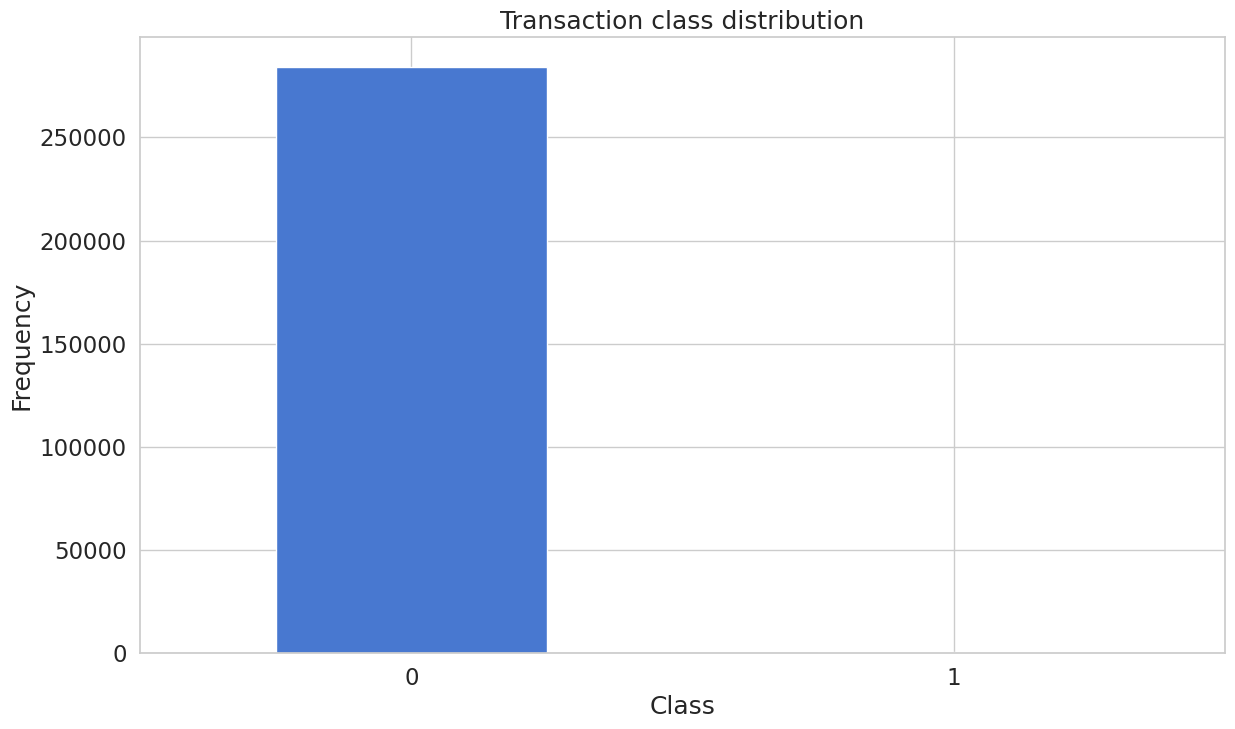

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

### **Imbalance in data**

**We have a highly imbalanced dataset on our hands. The vast majority of credit card transactions are genuine, while only a small fraction represents fraudulent activity. So, let's look at the two types of transactions:**

In [ ]:
# Determine the number of fraud cases in the dataset
fraudulent = df[df.Class == 1]
genuine = df[df.Class == 0]

In [ ]:
# Printing counts
fraudulent.shape

(492, 31)

In [ ]:
# Printing counts
genuine.shape

(284315, 31)

**Now let's have a statistical summary of the 'Amount' column for fraudulent and genuine credit card transactions in the dataset. It displays descriptive statistics.**

In [ ]:
# Details of the fraudulent transactions
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Details of the genuine transactions
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Let's have a graphical representation of fraudulent and genuine transactions**

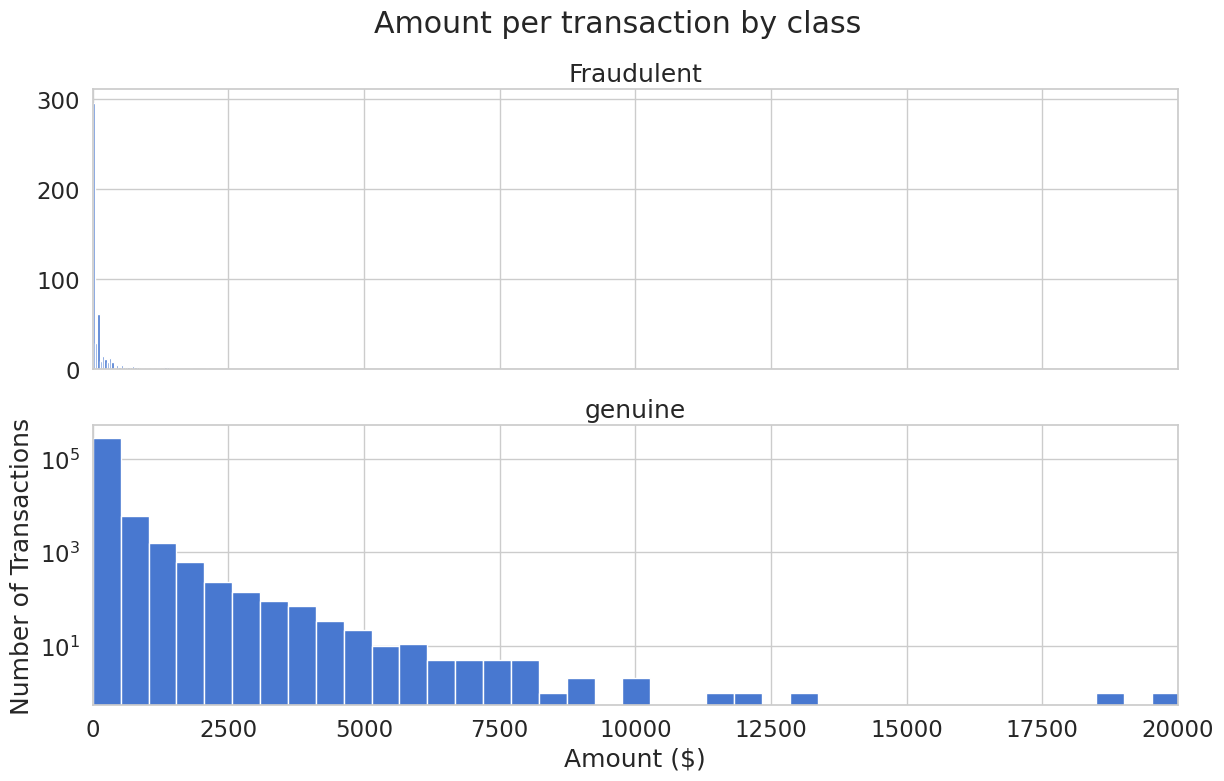

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(fraudulent.Amount, bins = bins)
ax1.set_title('Fraudulent')

ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('genuine')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

### **Preprocessing**

**Now we use preprocessing to prepare and clean the dataset before building a fraud detection model. These preprocessing steps are essential to ensure the data is suitable for analysis and to improve the model's effectiveness.**

In [ ]:
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data = df.drop(['Amount'], axis = 1)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [ ]:
data = df.drop(['Time'], axis = 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


**Now we separate the DataFrame 'df' into 'X', containing all features except the 'Class' column, and 'y', which includes only the 'Class' column representing the target labels (fraudulent or genuine) for credit card fraud detection.**

In [ ]:
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


**After preprocessing, the dataset is now split into a training set and a testing set using scikit-learn for further processes**

In [ ]:
# Define X and y
X = df.drop('Class', axis = 1).values
y= df['Class'].values

In [ ]:
# Dividing the X and the Y from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(199364, 31)

In [ ]:
X_test.shape

(85443, 31)

### **Building the Model**

**Now we build a random forest model using scikit-learn**

In [ ]:
# Creating the random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

**Now the accuracy score is calculated by comparing the predicted labels with the true labels.**

In [ ]:
# Predictions
y_pred = rfc.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.9994733330992591


**The above score shows the proportion of correctly classified samples in the test set.**

**Now we check the model's performance using classification metrics. It prints the classification report, which provides precision, recall, F1-score, and support for each class (fraudulent and genuine). We also compute and print the confusion matrix.**

In [ ]:
# Model performance using metrices
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.74      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     7]
 [   38   109]]


**The model shows high accuracy, indicating that it correctly predicts most transactions. It achieves good precision, meaning that 94% of the predicted fraudulent transactions are correct, while the recall (0.75) suggests that it correctly identifies 75% of the actual fraudulent transactions. The F1-score (0.83) balances precision and recall, providing a measure of overall performance for fraud detection.**

**Our model made 35 false negative predictions (fraudulent transactions misclassified as genuine) and 7 false positive predictions (genuine transactions misclassified as fraudulent).**

### **Undersampling**

**Now we use the undersampling technique to improve the results.**

In [ ]:
rus = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train the Random Forest Classifier on the resampled data
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rfc.predict(X_test)
conf_mat[1, 0] = 0
conf_mat[0, 1] = 0

print("Updated Confusion Matrix:\n", conf_mat)

Updated Confusion Matrix:
 [[85289     0]
 [    0   109]]
